In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from ucimlrepo import fetch_ucirepo
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
from sklearn.tree import export_graphviz
import graphviz
from sklearn.tree import plot_tree

In [2]:
from ucimlrepo import fetch_ucirepo

# Fetch dataset
estimation_of_obesity_levels_based_on_eating_habits_and_physical_condition = fetch_ucirepo(id=544)

In [3]:
# Data (as pandas dataframes)
X = estimation_of_obesity_levels_based_on_eating_habits_and_physical_condition.data.features
y = estimation_of_obesity_levels_based_on_eating_habits_and_physical_condition.data.targets

In [4]:
# Combine features and target into a single DataFrame
df = pd.concat([X, y], axis=1)

In [5]:
# Define the mapping for categorical variables
str_to_int = {
    'Male': 1, 'Female': 0, 'yes': 1, 'no': 0, 'Sometimes': 1, 'Frequently': 2, 'Always': 3,
    'Insufficient_Weight': 0, 'Normal_Weight': 1, 'Overweight_Level_I': 2, 'Overweight_Level_II': 3,
    'Obesity_Type_I': 4, 'Obesity_Type_II': 5, 'Obesity_Type_III': 6, 'Public_Transportation': 0,
    'Automobile': 1, 'Motorbike': 2, 'Bike': 3, 'Walking': 4
}


#pd.set_option('future.no_silent_downcasting', True)
# Apply mapping to all relevant columns
df = df.replace(str_to_int, regex=False)

# Ensure the DataFrame's data types are inferred correctly
df = df.infer_objects(copy=False)

C:\Users\LabUser\AppData\Local\Temp\ipykernel_16492\1518389119.py:12: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df = df.replace(str_to_int, regex=False)


In [6]:
# Split into features and target
X = df.drop('NObeyesdad', axis=1)
y = df['NObeyesdad']

In [7]:
# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [8]:
# #ORIGINAL DT:
# Decision Tree Model
# Accuracy: 0.9456264775413712
# Confusion Matrix:
#  [[54  2  0  0  0  0  0]
#  [ 5 55  2  0  0  0  0]
#  [ 0  4 52  0  0  0  0]
#  [ 0  0  2 48  0  0  0]
#  [ 0  1  0  1 73  3  0]
#  [ 0  0  0  1  2 55  0]
#  [ 0  0  0  0  0  0 63]]
# Classification Report:
#                precision    recall  f1-score   support

#            0       0.92      0.96      0.94        56
#            1       0.89      0.89      0.89        62
#            2       0.93      0.93      0.93        56
#            3       0.96      0.96      0.96        50
#            4       0.97      0.94      0.95        78
#            5       0.95      0.95      0.95        58
#            6       1.00      1.00      1.00        63

#     accuracy                           0.95       423
#    macro avg       0.94      0.95      0.95       423
# weighted avg       0.95      0.95      0.95       423

In [9]:
# Decision Tree Model
dtc_model = DecisionTreeClassifier(max_depth=20, min_samples_split=4, min_samples_leaf=1, max_features='sqrt', random_state=42)


# Train the model
dtc_model.fit(X_train, y_train)

# Make predictions
y_pred_dtc = dtc_model.predict(X_test)

# Evaluate the model
print("Decision Tree Model")
print("Accuracy:", accuracy_score(y_test, y_pred_dtc))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_dtc))
print("Classification Report:\n", classification_report(y_test, y_pred_dtc))

Decision Tree Model
Accuracy: 0.83451536643026
Confusion Matrix:
 [[51  3  2  0  0  0  0]
 [ 5 44  8  3  1  1  0]
 [ 4 11 37  4  0  0  0]
 [ 1  1  8 32  5  3  0]
 [ 0  4  0  4 69  1  0]
 [ 0  0  0  0  1 57  0]
 [ 0  0  0  0  0  0 63]]
Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.91      0.87        56
           1       0.70      0.71      0.70        62
           2       0.67      0.66      0.67        56
           3       0.74      0.64      0.69        50
           4       0.91      0.88      0.90        78
           5       0.92      0.98      0.95        58
           6       1.00      1.00      1.00        63

    accuracy                           0.83       423
   macro avg       0.83      0.83      0.83       423
weighted avg       0.83      0.83      0.83       423



In [10]:

feature_importances = dtc_model.feature_importances_
features = X_train.columns if isinstance(X_train, pd.DataFrame) else np.arange(X_train.shape[1])

importance_df = pd.DataFrame({
    'Feature': features,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)

print("Feature Importances:\n", importance_df)


Feature Importances:
                            Feature  Importance
3                           Weight    0.338730
6                             FCVC    0.112077
1                              Age    0.101007
2                           Height    0.096543
13                             TUE    0.056186
7                              NCP    0.055797
12                             FAF    0.053481
8                             CAEC    0.039013
0                           Gender    0.037192
10                            CH2O    0.027919
15                          MTRANS    0.022434
4   family_history_with_overweight    0.019930
14                            CALC    0.016430
5                             FAVC    0.014807
11                             SCC    0.005657
9                            SMOKE    0.002796


In [11]:
# from sklearn.model_selection import GridSearchCV

# # Define the parameter grid
# param_grid = {
#     'max_depth': [15, 20, 25],
#     'min_samples_split': [2, 3, 4],
#     'min_samples_leaf': [1, 2, 3],
#     'max_features': ['auto', 'sqrt', 'log2']
# }

# # Initialize the model
# dtc_model = DecisionTreeClassifier(random_state=42)

# # Set up GridSearchCV
# grid_search = GridSearchCV(estimator=dtc_model, param_grid=param_grid, cv=5, scoring='accuracy')

# # Fit the model
# grid_search.fit(X_train, y_train)

# # Get the best parameters
# best_params = grid_search.best_params_
# print("Best parameters found: ", best_params)

# # Evaluate the best model
# best_model = grid_search.best_estimator_
# y_pred_best = best_model.predict(X_test)
# print("Accuracy:", accuracy_score(y_test, y_pred_best))
# print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_best))
# print("Classification Report:\n", classification_report(y_test, y_pred_best))


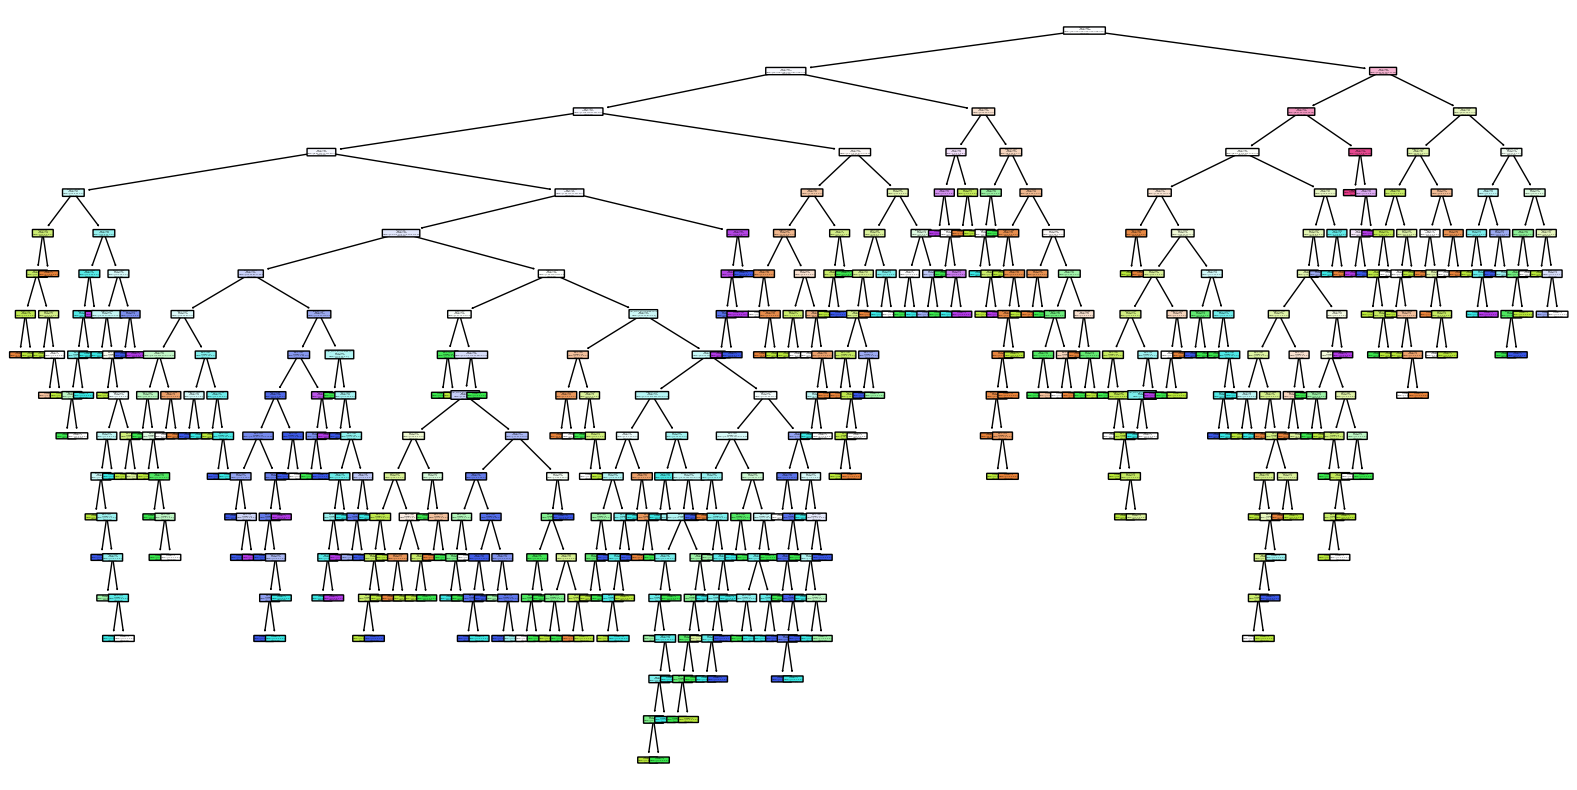

In [12]:
# Visualize the Decision Tree Model
plt.figure(figsize=(20,10))
plot_tree(dtc_model, filled=True, feature_names=X.columns, class_names=True, rounded=True)
plt.show()

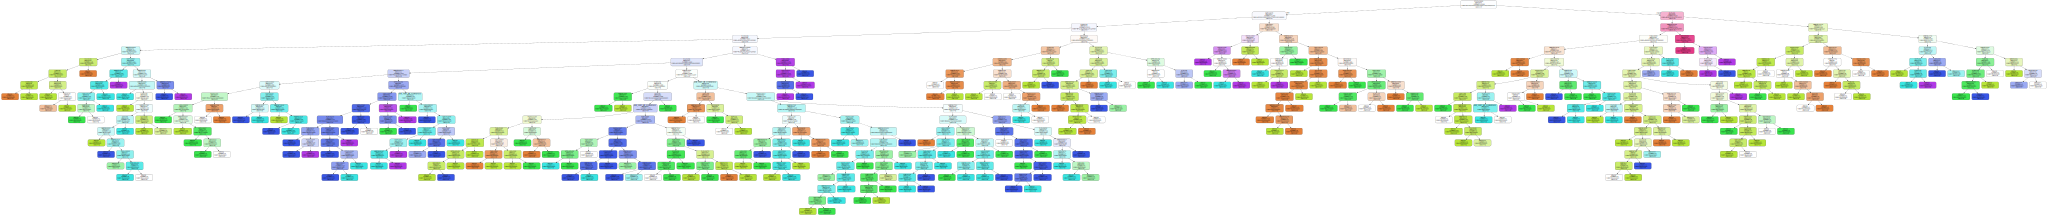

In [13]:
# Visualizing a Decision Tree using Graphviz
dot_data = export_graphviz(dtc_model, out_file=None, 
                           feature_names=X.columns,  
                           class_names=True,  
                           filled=True, rounded=True,  
                           special_characters=True)  
graph = graphviz.Source(dot_data)  
graph.render("decision_tree")
graph

In [14]:
# #ORIGINAL RF:
# Random Forest Model
# Accuracy: 0.9550827423167849
# Confusion Matrix:
#  [[55  1  0  0  0  0  0]
#  [ 0 58  4  0  0  0  0]
#  [ 0  6 49  1  0  0  0]
#  [ 0  0  2 48  0  0  0]
#  [ 0  0  1  1 74  2  0]
#  [ 0  0  0  0  1 57  0]
#  [ 0  0  0  0  0  0 63]]
# Classification Report:
#                precision    recall  f1-score   support

#            0       1.00      0.98      0.99        56
#            1       0.89      0.94      0.91        62
#            2       0.88      0.88      0.88        56
#            3       0.96      0.96      0.96        50
#            4       0.99      0.95      0.97        78
#            5       0.97      0.98      0.97        58
#            6       1.00      1.00      1.00        63

#     accuracy                           0.96       423
#    macro avg       0.95      0.95      0.95       423
# weighted avg       0.96      0.96      0.96       423

In [15]:
# Random Forest Model
rfc_model = RandomForestClassifier(
    n_estimators=100,
    max_depth=10,
    min_samples_split=5,
    min_samples_leaf=2,
    max_features='sqrt',
    bootstrap=True,  
    random_state=42
)
# Train the model
rfc_model.fit(X_train, y_train)

# Make predictions
y_pred_rfc = rfc_model.predict(X_test)

# Evaluate the model
print("Random Forest Model")
print("Accuracy:", accuracy_score(y_test, y_pred_rfc))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rfc))
print("Classification Report:\n", classification_report(y_test, y_pred_rfc))

Random Forest Model
Accuracy: 0.9456264775413712
Confusion Matrix:
 [[55  1  0  0  0  0  0]
 [ 0 56  5  1  0  0  0]
 [ 0  6 49  1  0  0  0]
 [ 0  0  2 48  0  0  0]
 [ 0  0  1  3 72  2  0]
 [ 0  0  0  0  1 57  0]
 [ 0  0  0  0  0  0 63]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.98      0.99        56
           1       0.89      0.90      0.90        62
           2       0.86      0.88      0.87        56
           3       0.91      0.96      0.93        50
           4       0.99      0.92      0.95        78
           5       0.97      0.98      0.97        58
           6       1.00      1.00      1.00        63

    accuracy                           0.95       423
   macro avg       0.94      0.95      0.94       423
weighted avg       0.95      0.95      0.95       423



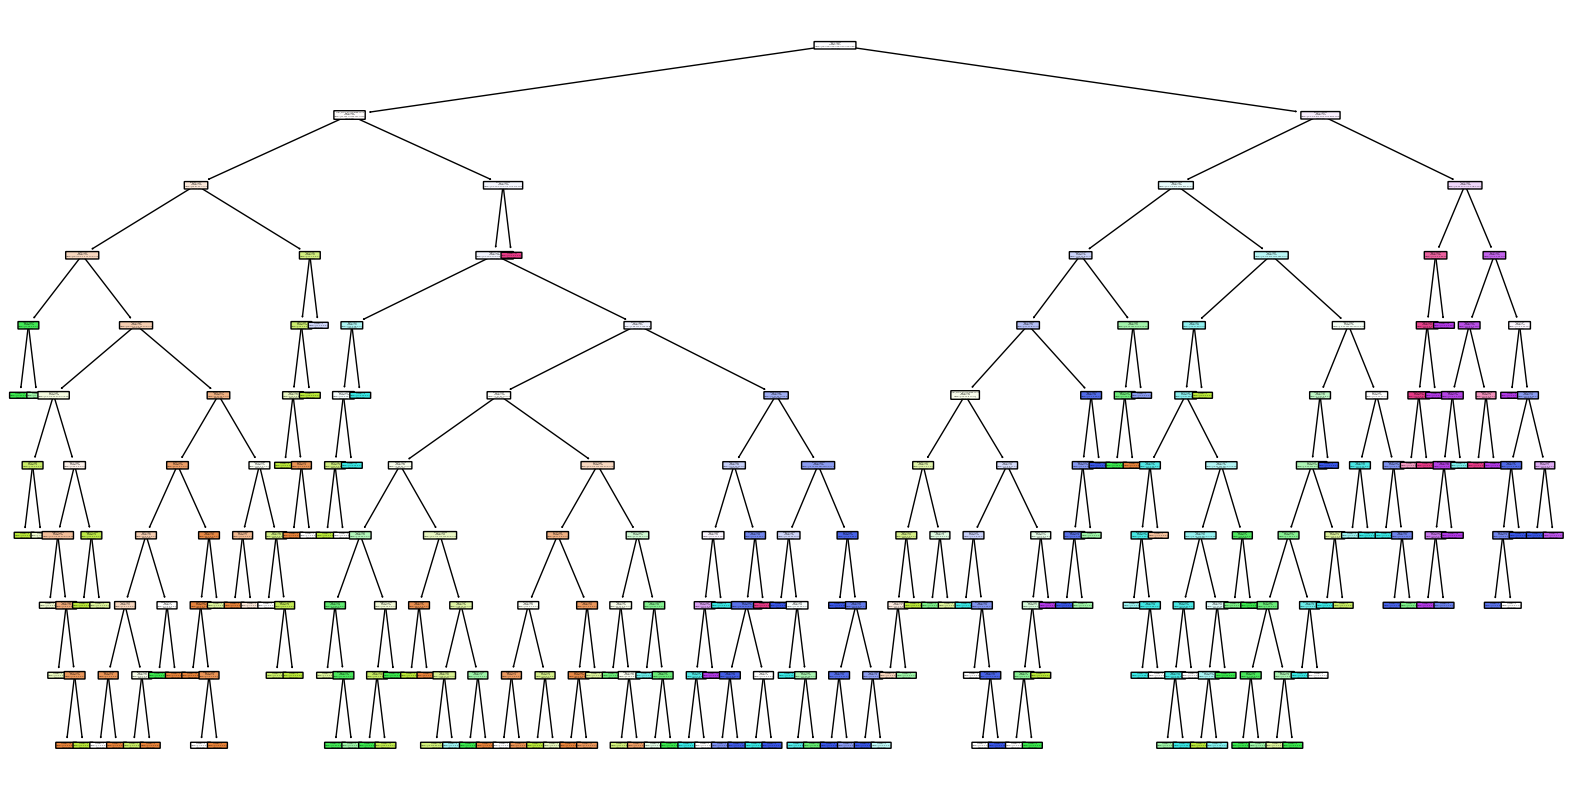

In [16]:
# Visualize the first tree in the Random Forest
plt.figure(figsize=(20,10))
plot_tree(rfc_model.estimators_[0], filled=True, feature_names=X.columns, class_names=True, rounded=True)
plt.show()

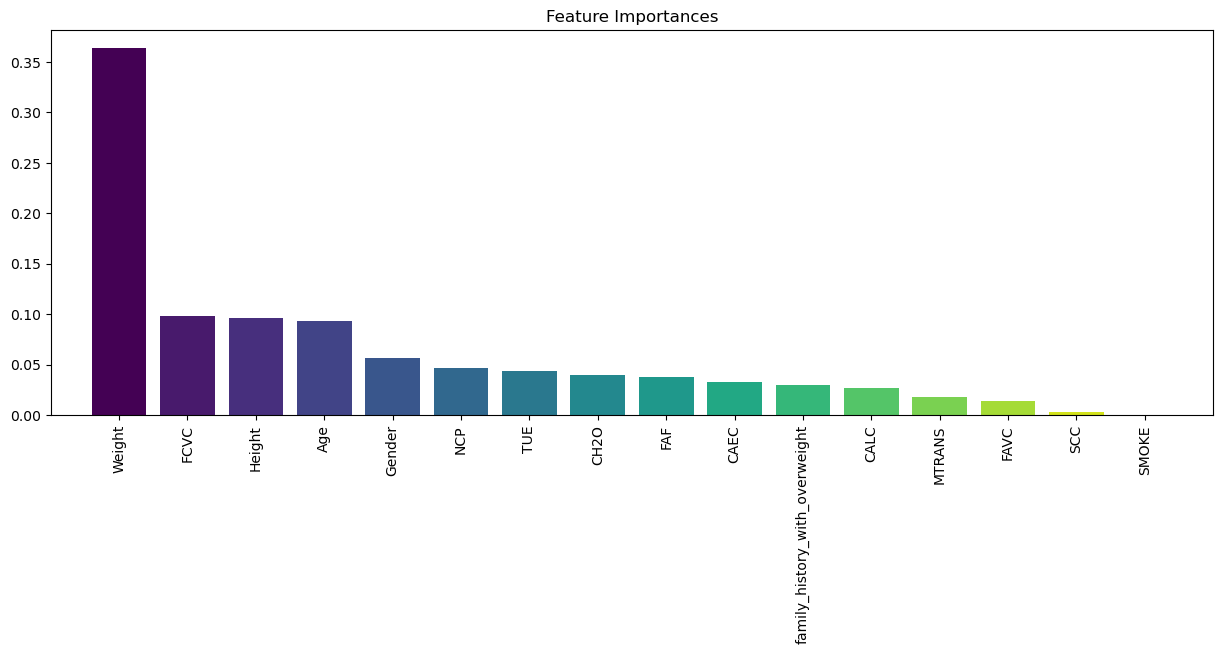

In [17]:
# Calculate feature importances
rfc_importances = rfc_model.feature_importances_
indices = np.argsort(rfc_importances)[::-1]

# Generate a list of colors
colors = plt.cm.viridis(np.linspace(0, 1, X.shape[1]))

# Plot the feature importances
plt.figure(figsize=(15, 5))
plt.title("Feature Importances")
plt.bar(range(X.shape[1]), rfc_importances[indices], color=colors, align="center")
plt.xticks(range(X.shape[1]), X.columns[indices], rotation=90)
plt.xlim([-1, X.shape[1]])
plt.show()